In [3]:
#Testing sin(nx)
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
plt.rc('text', usetex=True)

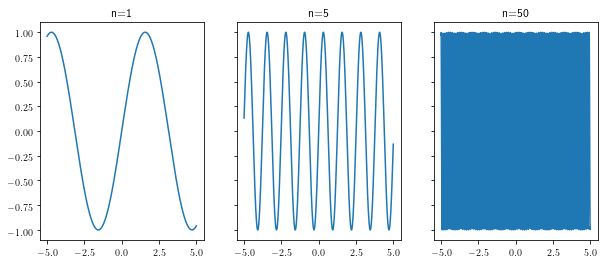

<Figure size 432x288 with 0 Axes>

In [33]:
x = np.linspace(-5,5,1500)
# plt.plot(x,np.sin(x),label = 'n=1')
# # plt.plot(x,np.sin(2*x),label = 'n=2')
# plt.plot(x,np.sin(5*x),label = 'n=5')
# plt.xlabel('x')
# plt.ylabel(r'$f_n(x)$')
# plt.legend()

#so we're going to remake this into three separate figures. Should be pretty easy to do
#lets figure out subplots
f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True)
f.set_figwidth(10)
ax1.plot(x,np.sin(x))
ax1.set_title('n=1')
ax2.plot(x,np.sin(5*x))
ax2.set_title('n=5')
ax3.plot(x,np.sin(50*x))
ax3.set_title('n=50')
plt.show()
plt.savefig('fig46v3.png')

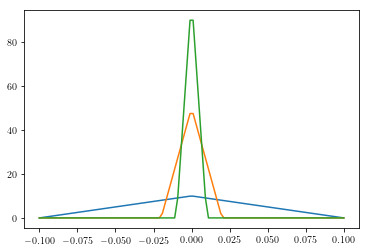

In [6]:
#Additionally we're going to explore products of functions that seem to converge to the delta function
#first we need to define our sequence of functions
x = np.linspace(-1/10,1/10,100)
def f(x,n):
    if 0 < x and x < 1/n:
        return n-n**2*x
    elif -1/n < x and x < 0:
        return n+n**2*x
    else:
        return 0
    
def output(input,n):
    size = len(x)
    values = np.empty(size)
    for i in range(0,size):
        values[i] = f(x[i],n)
    return values
#now lets try to plot this
plt.plot(x,output(x,10))
plt.plot(x,output(x,50))
plt.plot(x,output(x,100))
#nice

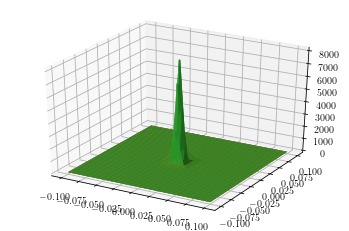

In [56]:
#Now in 3D. We have some groundwork (ie imports)
#ok let's create new array with product values
#ok so what I've learned is that I need to make a meshgrid of points
#
y = np.linspace(-1/10,1/10,100)
xs,ys = np.meshgrid(x,y)

def h(x,y,n):
    return f(x,n)*f(y,n)
    
#lets get some vectors boys
hvec = np.vectorize(h)
#we now have the ability to call h on our mesh
#internal loop iteration is done in C and is faster
#now we should be ready to plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xs,ys,hvec(xs,ys,10) )
ax.plot_surface(xs,ys,hvec(xs,ys,50) )
ax.plot_surface(xs,ys,hvec(xs,ys,100) )
#IT WORKS
#truly amazing what actually reading the docs can do
#TODO: Shell carved out by Bessel Function